# Project For Causal Inference
Mao keyu  20307130241

This notebook includes:
1. Overview of dataset and its distribution
2. Construction of prior DAG
3. Instrumental variable analysis based on several models


# Introduction of Dataset

**According to the article "Inhalable Particulate Matter and Health (PM2.5 and PM10)"(https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health),**

Airborne particulate matter (PM) is not a single pollutant, but rather is a mixture of many chemical species. It is a complex mixture of solids and aerosols composed of small droplets of liquid, dry solid fragments, and solid cores with liquid coatings. Particles vary widely in size, shape and chemical composition, and may contain inorganic ions, metallic compounds, elemental carbon, organic compounds, and compounds from the earth’s crust. Particles are defined by their diameter for air quality regulatory purposes. Those with a diameter of 10 microns or less (PM10) are inhalable into the lungs and can induce adverse health effects. Fine particulate matter is defined as particles that are 2.5 microns or less in diameter (PM2.5). Therefore, PM2.5 comprises a portion of PM10.


**Air Quality Index (AQI)**

**According to the article "Air Quality Index (AQI) Basics"(https://www.airnow.gov/aqi/aqi-basics/),**

The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. The color makes it easy for people to quickly determine whether air quality is reaching unhealthy levels in their communities.

**This dataset provides geolocated information about the following pollutants:**

* Nitrogen Dioxide [NO2] : Nitrogen Dioxide is one of the several nitrogen oxides. It is introduced into the air by natural phenomena like entry from stratosphere or lighting. At the surface level, however, NO2 forms from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma. Longer exposures may contribute to develoment of asthma and respiratory infections. People with asthma, children and the elderly are at greater risk for the health effects of NO2.
* Ozone [O3] : The Ozone molecule is harmful for outdoor air quality (if outside of the ozone layer). At surface level, ozone is created by chemical reactions between oxides of nitrogen and volatile organic compounds (VOC). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation. Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems. In particular, it damages sensitive vegetation during the growing season.
* Carbon Monoxide [CO] : Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels. Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality.
Breathing air with a high concentration of CO reduces the amount of oxygen that can be transported in the blood stream to critical organs like the heart and brain. At very high levels, which are not likely to occur outdoor but which are possible in enclosed environments. CO can cause dizziness, confusion, unconsciousness and death.
* Particulate Matter [PM2.5] : Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as group 1 carcinogen by the International Agengy for Research on Cancer (IARC). PM10 refers to those particules with a diameter of 10 micrometers or less. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

**Features of dataset**

* Country : Name of the country
* City : Name of the city
* AQI Value : Overall AQI value of the city
* AQI Category : Overall AQI category of the city
* CO AQI Value : AQI value of Carbon Monoxide of the city
* CO AQI Category : AQI category of Carbon Monoxide of the city
* Ozone AQI Value : AQI value of Ozone of the city
* Ozone AQI Category : AQI category of Ozone of the city
* NO2 AQI Value : AQI value of Nitrogen Dioxide of the city
* NO2 AQI Category : AQI category of Nitrogen Dioxide of the city
* PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
* PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


# Importing Packages

This work is done on kaggle, but if you can ensure that input files are prepared and then running locally is all right.

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pm-data/clean_data.csv
/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv
/kaggle/input/heart-disease-dataset/heart.csv


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv('/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv')

# Data Outline

In [155]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


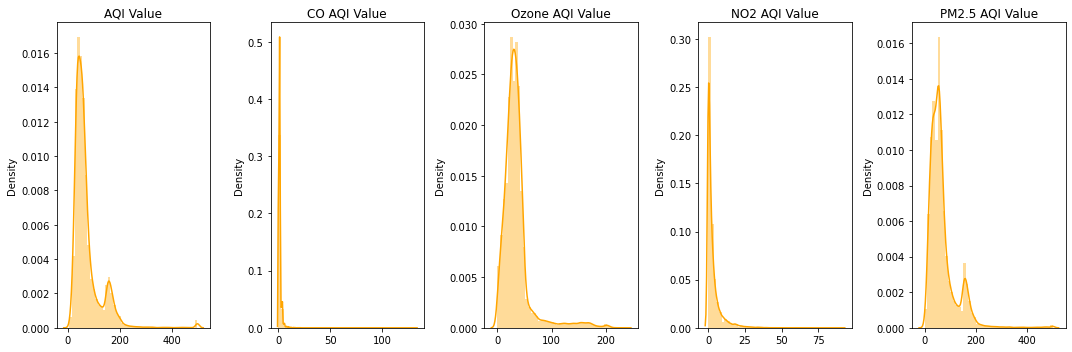

In [161]:
col=[ 'AQI Value', 'CO AQI Value',
       'Ozone AQI Value','NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,5,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]], color='orange')
plt.tight_layout()
plt.savefig("value desity")
plt.show()

**5) Boxplot by features and categories**

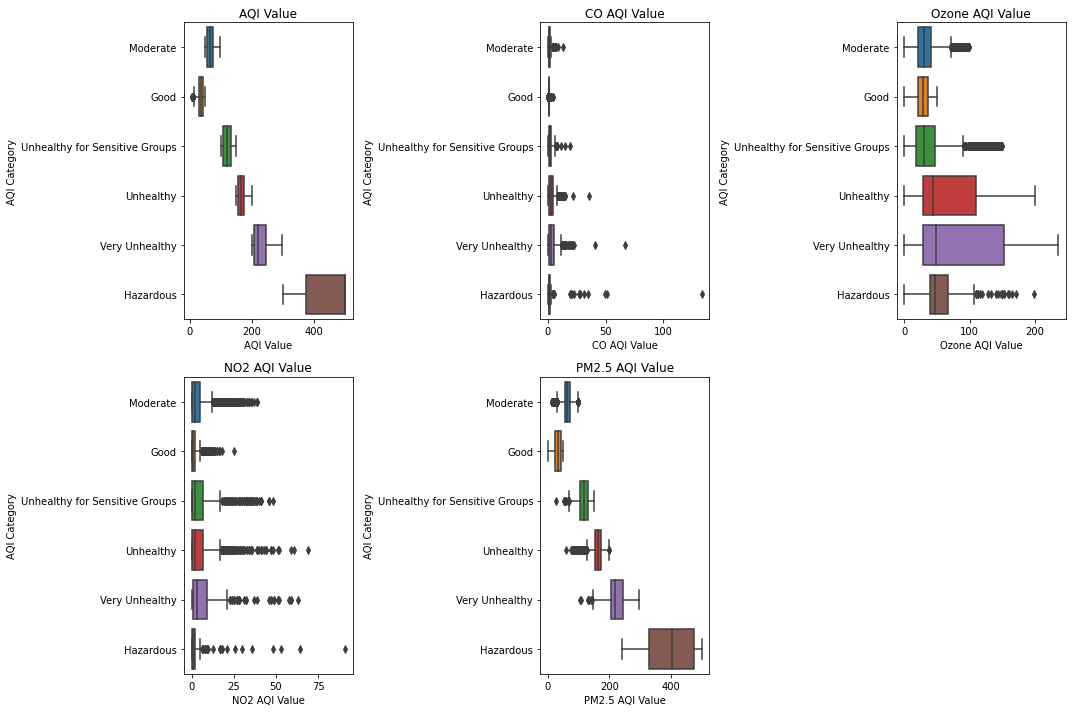

In [162]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])
plt.tight_layout()
plt.savefig("box.png")
plt.show()

**6) Pairplot**

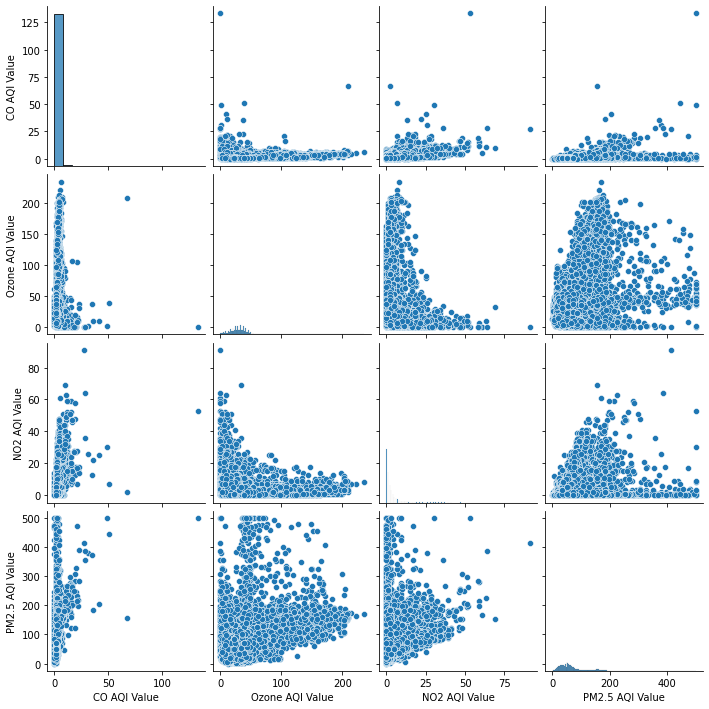

In [165]:
sns.pairplot(df.drop(['AQI Value'], axis=1))
plt.savefig('pair.png')

**7) Correlation heatmap**

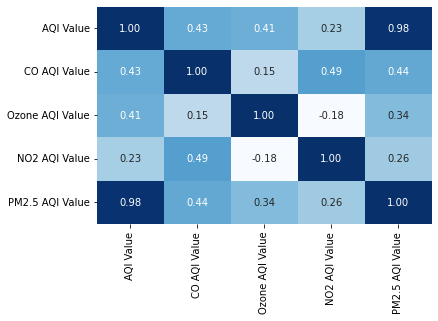

In [164]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.2f');
plt.savefig("heat.png")

# Prior DAG Construction

**1) Importing**

In [4]:
pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.9/201.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=0f6f407f2d9aaac88bf9ab4dd7915ff79381c7f4f8a3cdd17bd04237ed7f459a
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [7]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [75]:
Country = list(set(df['Country']))
ids = [i for i in range(175)]
C_d = dict(zip(Country, ids))
allcon = {
    'Good':0,
    'Moderate':1,
    'Unhealthy':3,
    'Unhealthy for Sensitive Groups':2,
    'Very Unhealthy':4,
    'Hazardous':5
}

In [91]:
df1 = df.drop(['City'], axis=1)
# Encoding
for i in range(len(df1)):
    df1['Country'].iloc[i] = C_d[df1['Country'].iloc[i]]
    df1['AQI Category'].iloc[i] = allcon[df1['AQI Category'].iloc[i]]
    df1['PM2.5 AQI Category'].iloc[i] = allcon[df1['PM2.5 AQI Category'].iloc[i]]
df1.head()

,Country,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,123,51,1,1,0,36,2,0,0,51,1
1,71,41,0,1,0,5,0,1,0,41,0
2,108,66,1,1,0,39,2,2,1,66,1
3,0,34,0,1,0,34,2,0,0,20,0
4,37,22,0,0,0,22,1,0,0,6,0


In [92]:
df1 = df1.dropna(how='any')

**1) Create features for dataframe**

In [94]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

11
{'Country': 0, 'AQI Value': 1, 'AQI Category': 2, 'CO AQI Value': 3, 'CO AQI Category': 4, 'Ozone AQI Value': 5, 'Ozone AQI Category': 6, 'NO2 AQI Value': 7, 'NO2 AQI Category': 8, 'PM2.5 AQI Value': 9, 'PM2.5 AQI Category': 10}


**2) Prior Knowledge**

In [95]:
prior_knowledge = make_prior_knowledge(11,paths = [[df_dict['CO AQI Value'],df_dict['NO2 AQI Value']]])

**3) Modeling Causal inference**

In [96]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df1)

**4) Viewing causal DAG**

In [100]:
df1.to_csv("final_data.csv")

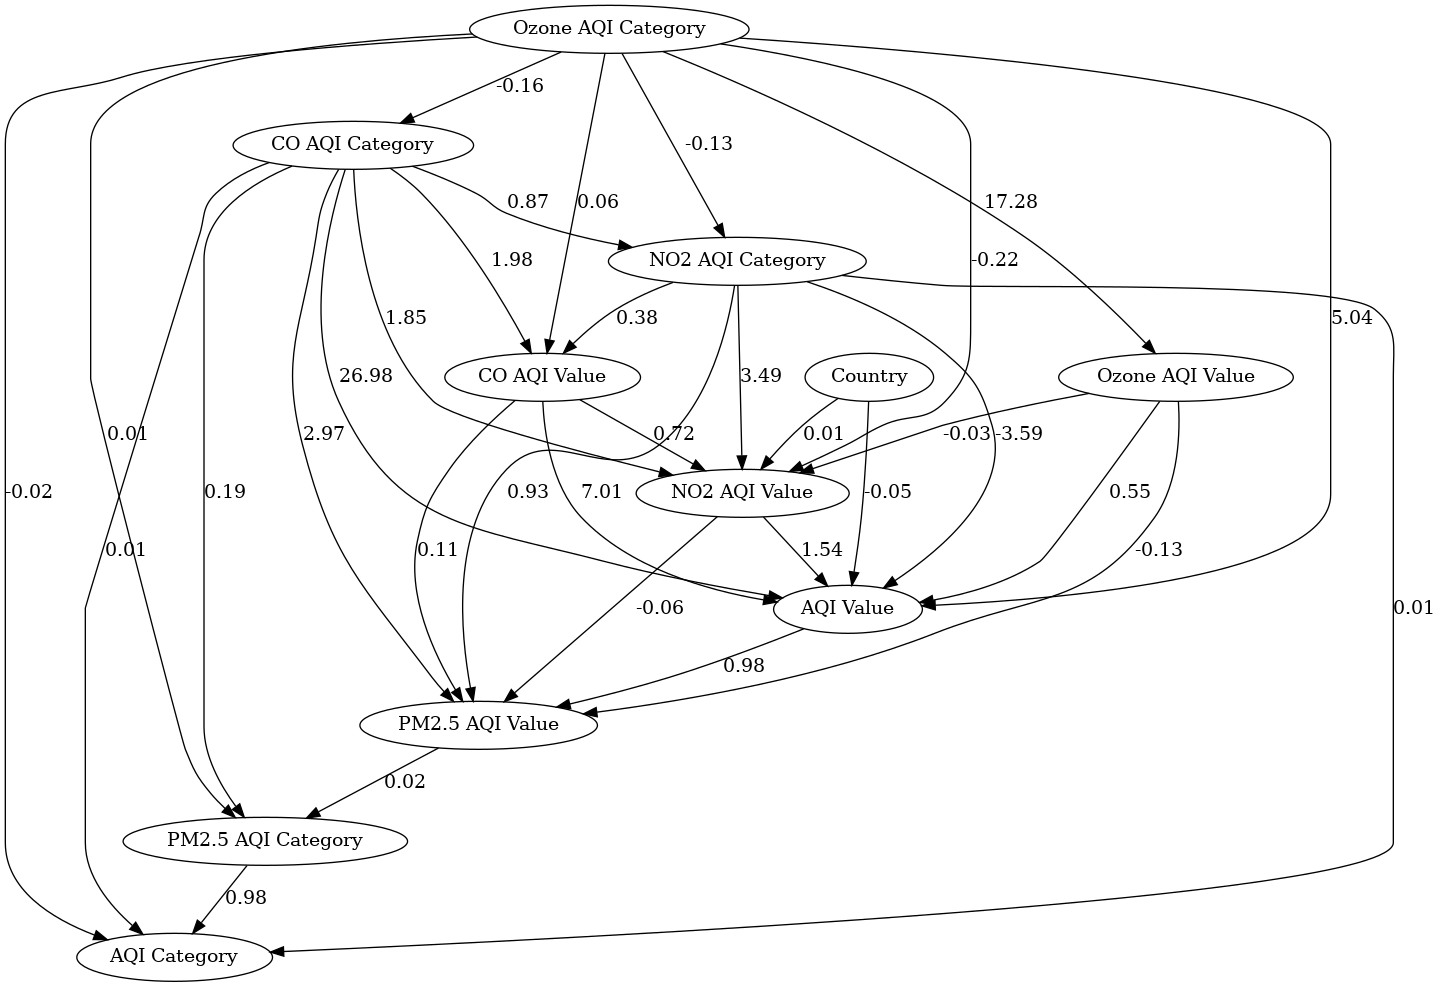

In [97]:
#code by "https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb

dot = make_dot(
    model.adjacency_matrix_,
     labels=df1.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

# Instrumental Variable Method

In [2]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
from linearmodels.datasets import mroz
from statsmodels.api import add_constant
from scipy.special import logit, expit

In [29]:
data = pd.read_csv('/kaggle/input/final-data/final_data.csv',index_col=0)
data = add_constant(data, has_constant="add")
temp = list(data.columns)
temp[10] = "PMval"
data.columns=temp
data.head(10)

,const,Country,AQI.Value,AQI.Category,CO.AQI.Value,CO.AQI.Category,Ozone.AQI.Value,Ozone.AQI.Category,NO2.AQI.Value,NO2.AQI.Category,PMval,PM2.5.AQI.Category
0,1.0,123,51,1,1,0,36,2,0,0,51,1
1,1.0,71,41,0,1,0,5,0,1,0,41,0
2,1.0,108,66,1,1,0,39,2,2,1,66,1
3,1.0,0,34,0,1,0,34,2,0,0,20,0
4,1.0,37,22,0,0,0,22,1,0,0,6,0
5,1.0,164,54,1,1,0,14,0,11,2,54,1
6,1.0,133,62,1,1,0,35,2,3,1,62,1
7,1.0,84,64,1,1,0,29,1,7,2,64,1
8,1.0,123,54,1,1,0,41,3,1,0,54,1
9,1.0,136,142,2,3,1,89,3,9,2,142,2


Try OLS First

In [39]:
from linearmodels.iv import IV2SLS
res_ols = IV2SLS.from_formula(('PMval~Country+CO.AQI.Category+NO2.AQI.Value+NO2.AQI.Category+Ozone.AQI.Value+Ozone.AQI.Category'), data).fit(
    cov_type="unadjusted"
)
print(res_ols)

                            OLS Estimation Summary                            
Dep. Variable:                  PMval   R-squared:                      0.2870
Estimator:                        OLS   Adj. R-squared:                 0.2869
No. Observations:               23035   F-statistic:                    9274.1
Date:                Fri, Jun 09 2023   P-value (F-stat)                0.0000
Time:                        05:34:23   Distribution:                  chi2(6)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
Intercept              37.850     0.8212     46.092     0.0000      36.240      39.459
Country             

Then Try 2SLS

In [37]:
res_iv= IV2SLS.from_formula('log(PMval+0.01) ~ Country+NO2.AQI.Value+NO2.AQI.Category+Ozone.AQI.Value+Ozone.AQI.Category+[CO.AQI.Category~CO.AQI.Value]', data).fit(
    cov_type="unadjusted"
)
print(res_iv)

                          IV-2SLS Estimation Summary                          
Dep. Variable:        log(PMval+0.01)   R-squared:                      0.8158
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8157
No. Observations:               23035   F-statistic:                 1.098e+05
Date:                Fri, Jun 09 2023   P-value (F-stat)                0.0000
Time:                        05:23:05   Distribution:                  chi2(6)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
Country                0.0188     0.0002     89.589     0.0000      0.0184      0.0192
NO2.AQI.Value       

In [40]:
from linearmodels.iv import compare
print(compare({"OLS": res_ols, "2SLS": res_iv}))

                     Model Comparison                    
                                  OLS                2SLS
---------------------------------------------------------
Dep. Variable                   PMval     log(PMval+0.01)
Estimator                         OLS             IV-2SLS
No. Observations                23035               23035
Cov. Est.                  unadjusted          unadjusted
R-squared                      0.2870              0.8158
Adj. R-squared                 0.2869              0.8157
F-statistic                    9274.1           1.098e+05
P-value (F-stat)               0.0000              0.0000
====================     ============   =================
Intercept                      37.850                    
                             (46.092)                    
Country                       -0.0777              0.0188
                            (-11.615)            (89.589)
CO.AQI.Category                39.874              3.4946
              

GMM and CUE-GMM are also applied

In [41]:
from linearmodels import IV2SLS, IVGMM, IVGMMCUE
res_iv_g= IVGMM.from_formula('log(PMval+0.01) ~ Country+NO2.AQI.Value+NO2.AQI.Category+Ozone.AQI.Value+Ozone.AQI.Category+[CO.AQI.Category~CO.AQI.Value]', data, weight_type="clustered",
    clusters=data['Country']).fit(
    cov_type="unadjusted"
)
print(res_iv_g)

                          IV-GMM Estimation Summary                           
Dep. Variable:        log(PMval+0.01)   R-squared:                      0.8158
Estimator:                     IV-GMM   Adj. R-squared:                 0.8157
No. Observations:               23035   F-statistic:                 1.197e+05
Date:                Fri, Jun 09 2023   P-value (F-stat)                0.0000
Time:                        05:36:15   Distribution:                  chi2(6)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
Country                0.0188     0.0002     93.505     0.0000      0.0184      0.0192
NO2.AQI.Value       

In [43]:
from linearmodels import IV2SLS, IVGMM, IVGMMCUE, IVLIML
res_iv_g_c= IVGMMCUE.from_formula('log(PMval+0.01) ~ Country+NO2.AQI.Value+NO2.AQI.Category+Ozone.AQI.Value+Ozone.AQI.Category+[CO.AQI.Category~CO.AQI.Value]', data)
res_gmm_cue = res_iv_g_c.fit(cov_type="robust")
print(res_gmm_cue)

                          IV-GMM Estimation Summary                           
Dep. Variable:        log(PMval+0.01)   R-squared:                      0.8158
Estimator:                     IV-GMM   Adj. R-squared:                 0.8157
No. Observations:               23035   F-statistic:                 1.366e+05
Date:                Fri, Jun 09 2023   P-value (F-stat)                0.0000
Time:                        05:37:06   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
Country                0.0188     0.0002     93.673     0.0000      0.0184      0.0192
NO2.AQI.Value       

In [44]:
print(compare({"2SLS": res_iv,"GMM": res_iv_g,"GMM-Con":res_gmm_cue }))

                                 Model Comparison                                 
                                      2SLS                 GMM             GMM-Con
----------------------------------------------------------------------------------
Dep. Variable              log(PMval+0.01)     log(PMval+0.01)     log(PMval+0.01)
Estimator                          IV-2SLS              IV-GMM              IV-GMM
No. Observations                     23035               23035               23035
Cov. Est.                       unadjusted          unadjusted              robust
R-squared                           0.8158              0.8158              0.8158
Adj. R-squared                      0.8157              0.8157              0.8157
F-statistic                      1.098e+05           1.197e+05           1.366e+05
P-value (F-stat)                    0.0000              0.0000              0.0000
====================     =================   =================   =================
Coun

**Dowhy can be used to view simple relation in the model**

In [128]:
import warnings
warnings.filterwarnings('ignore')

from dowhy import CausalModel
from dowhy import datasets
# import econml # Needed for Double ML

import networkx as nx
import matplotlib.pyplot as plt

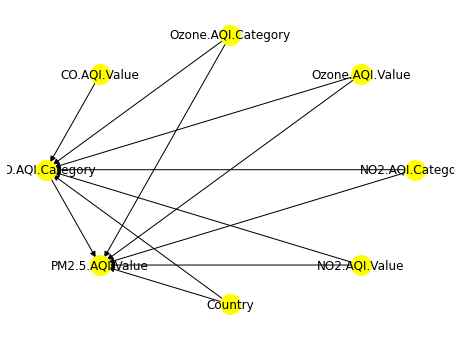

In [145]:
model=CausalModel(
        data = data,
        treatment='CO.AQI.Category',
        outcome='PM2.5.AQI.Value',
        common_causes=["Country","NO2.AQI.Value","NO2.AQI.Category","Ozone.AQI.Value","Ozone.AQI.Category"],
        instruments='CO.AQI.Value'
    )


model.view_model()